# **Coding the Linear regression Model From Scratch**

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#importing necessary libraries

## Normalize function 

Add your code in the cell below to normalize the independent variables, making them zero mean and unit variance.

In [ ]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    
    X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0) 
    # columnwise calculating the mean of the matrix and subtracting all the values in the same column by that mean
    # columnwise calculating the standard dev. of the matrix and dividing all the resulant values in the same column by that standard dev.

    return X
    #return the value     
   # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [ ]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    
    arr_of_ones = np.ones([len(X),1])   
    #creating an array of number "1" of shape : (number of rows in X x 1)

    getX = np.concatenate((X, arr_of_ones), axis = 1)  
    # concatenation of the array of ones with the array  X

    result = np.matmul(getX, w)   
    #matrix multiplication of X with w

    return result   
    #retrun the result
    #raise NotImplementedError()


In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [ ]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    Y = Prediction(X,w)   
    # Predicting the value of a label from the input features by calling prediction function 

    SquaredDiff = np.square(Y - t)    
    # Squaring each of the difference in the vector

    SquaredDiff = np.sum(SquaredDiff) / len(X)    
    # Taking the sum of all the squares and dividing it with the number of rows (equivalent to the number of model inputs)

    return SquaredDiff
    # YOUR CODE HERE
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [ ]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    
    Y = Prediction(X,w)             
    #call the prediction function to obtain the predicted value

    Diff = np.array(abs(Y - t))     
    # Absolute error is the modulus of predicted value - orginal value

    Abb_Diff = sum(Diff)/len(X)     
    # Mean absolute error will be sum of the the error divide by total number of elements  
    
    return Abb_Diff                 
    #Return value
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [ ]:
def L2_Loss (X, t, w, lamda= 0):
   # Output should be a single number
    ''' Need to specify what inputs are'''
    
    Mean_square_error = MSE_Loss(X, t, w)  
    #Calling the Mean square error function

    square_weights = np.square(w)          
     #sqaring the weights

    sum_sqr_weights = (sum(square_weights[:-1])) ** 0.5  
    #square root of the sum of the squares of the weights excluding w0

    L2_loss = Mean_square_error + (lamda * sum_sqr_weights)   
    # calculating final L2_loss according to L2 = MSE + (lamda * sum_sqr_weights)

    return L2_loss            
    #Returning the output   
    #raise NotImplementedError

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [ ]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    
    Mean_square_error = MSE_Loss(X, t, w, lamda = 0)  
    #calling the MSE loss function

    sum_weights = np.sum(abs(w)[:-1])   
    #finding the sum of the modulus values of weights excluding w0

    L1_loss = Mean_square_error + (lamda * sum_weights) 
    #finding L1 according to MSE + (lamda * sum_weights)

    return L1_loss    
    #returning L1 loss value
    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [ ]:
def NRMSE_Metric (X, t, w): # Output should be a single number
    # YOUR CODE HERE

    mean_square_value = MSE_Loss (X, t, w) 
    #Calling the mean quare value function

    RMSE = np.sqrt(mean_square_value)      
    #Calculating the Normalised root means square value by divide with std of actual t

    NRMSE = RMSE/ t.std()                  
    #calculating NRMSE using the equation RMSE/ standard deviation

    return NRMSE
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [ ]:
def MSE_Gradient (X, t, w, lamda=0):
    
    Y_predicted = Prediction (X, w)        
    #predicting the y using the prediction function

    arr_of_ones = np.ones([len(X),1])       
    #creating the matrix of ones in shape of (length of rows in X * 1)

    getX = np.concatenate((X, arr_of_ones), axis = 1)     
    #concatenating the array in the given data of X for the X term in gradient equation

    gradient = (getX.T.dot(Y_predicted - t)) *2 /len(X)     
    #finding the gradient using X.(y-t)*2/number of rows in the data

    return gradient     
    #Return gradient function    
    #raise NotImplementedError()
    

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [ ]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    
    Y_predicted = Prediction (X, w)         
    #predicting the y using the weight vector

    arr_of_ones = np.ones([len(X),1])       
    #creating the matrix of ones in shape of (length of rows in X * 1)

    getX = np.concatenate((X, arr_of_ones), axis = 1)  
    #concatenating the array in the given data of X for the X term in gradient equation

    MAE_grad = getX.T.dot(np.sign(Y_predicted - t)) / len(X)  
    #predicting the MAE gradient using the equation MAE_grad = 

    return MAE_grad         
    #reurn the MAE_gradient value
    ##raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [ ]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    w0 = np.copy(w)    
    w0[-1] = 0
    #copying the weights to assign w0 = 0 in a separate array

    square_weights = np.square(w)
    sum_sqr_weights = (sum(square_weights[:-1])) ** 0.5
    #finding square root of the sum of the squares of the weights except w0

    gradient = MSE_Gradient(X,t,w) + (lamda/sum_sqr_weights)*w0
    #calculating the gradient using the formula L2_gradient = MSE_Gradient + sqrt(lamda/sum_sqr_weights)*weights except w0

    return gradient
    #return gradient
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [ ]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    
    w0 = np.copy(w)
    w0[-1] = 0
    #copying the weights to assign w0 = 0 in a separate array

    gradient_1 = MSE_Gradient(X,t,w) + (lamda * np.sign(w0))
    #calculating the gradient using the formula L2_gradient = MSE_Gradient + (lamda)*(signum of weights without w0)
    
    return gradient_1
    #return gradient values

    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [ ]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    
    L2Lossi = L2_Loss(X, t, w, lamda)
    #calling the L2 loss function

    for i in range(max_iter):
      w = w - lr* L2_Gradient(X, t, w, lamda)                #New value of w after one iteration
      L2Lossf = L2_Loss(X, t, w, lamda)                      #finding the loss function for the new weights
      if((L2Lossi - L2Lossf) < epsilon):
        break
        #if the difference between two loss values become less than the epsilon value, loop breaks 
    
    w_final = w
    #Assigning the final weights

    train_loss_final = MSE_Loss(X, t, w)
    #Assigning final loss value

    validation_loss_final = MSE_Loss(X_val, t_val, w)
    #Assigning the loss value for validation data 

    validation_NRMSE = NRMSE_Metric(X_val, t_val, w)
    #Assigning the NRMSE for validation data 

    return w_final, train_loss_final, validation_loss_final, validation_NRMSE 
    #Returning w_final, train_loss_final, validation_loss_final, validation_NRMS

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
np.random.seed(2)

X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

In [ ]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
   
    arr_ones = np.ones([len(X),1])       
    #creating  array of ones with number of rows equal to number of total samples in a variable

    get_X = np.concatenate((X,arr_ones),axis = 1)   
    #concatenating ones vector 

    regular = lamda *np.eye(len(get_X.T))
    regular[len(get_X.T)-1][len(get_X.T)-1] = 0  
    # Reularisation function (lamda * I matrix and assigning last value of lamda*I = 0 to eliminate the bias term in regularization

    X_inverse = np.linalg.inv(np.matmul(get_X.T,get_X) + lamda *np.eye(len(get_X.T)))  
    #first term of the pseudo inverse method = inverse of (X'.X + lamda * i) 
    
    w = X_inverse.dot(get_X.T).dot(t)     
    #predicting the w values using psedo inverse equation #w = (X' X + lambda I)^(-1) X' t

    return w
    #returning_weights
    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

## Importing and preparing data

In [ ]:
df = pd.read_csv("TempTrain.csv")
#importing data

In [ ]:
df = df.sample(frac = 1)
#shuffling the data before dividing into training and validation set

In [ ]:
div = int(len(df)*0.8) 
#Determining the point of split according to 80:20 (train : validation) distribution

In [ ]:
df_train = df.iloc[:div]
#Allocating the first 80% of the data to the training subset

df_val = df.iloc[div:]
#Allocating the last 20% of the data to the validation subset

In [ ]:
df_normal_train = Normalize(df_train) 
#Normalising the training data using Normalize function

df_normal_val = Normalize(df_val)
#Normalising the validation data using Normalize function

In [ ]:
X_train = df_normal_train.drop(['Next_Tmax'],axis=1).values
#Storing the independent variables as X_train for the training data

X_valid = df_normal_val.drop(['Next_Tmax'],axis=1).values
#Storing the independent variables as X_val for the validation data

Y_train = df_normal_train['Next_Tmax'].values
#Storing the dependent variables as Y_train for the training data

Y_valid = df_normal_val['Next_Tmax'].values
#Storing the dependent variables as Y_val for the validation data

## Generating the model using the MSE+lamda*L2(w) loss function

In [ ]:
lamdai = 0.001
lamdaf = 100000
#Assigning the initial and final values of lamda

complexity1 = np.array([])
RMSE_values_valid1 = np.array([])
RMSE_values_train1 = np.array([])
#creating the null arrays for storing the values of complexity, RMSE values of train and validation data

w1 = np.random.randn(len(X_train[0])+1)
#Creating a random weight vector

while lamdai <= lamdaf:
  complexity1 = np.append(complexity1, [1/lamdai])
  #Appending the complexity values to the complexity array
  
  results1 = Gradient_Descent(X_train, X_valid, Y_train, Y_valid, w1, lamdai, 300, 1e-10, 5e-2, L2_Loss,L2_Gradient)
  #Calling the gradient descent function to find the weight vector

  RMSE_valid1 = np.sqrt(results1[2])
  RMSE_train1 = np.sqrt(results1[1])
  #Storing the RMSE values for both training and validation data 

  RMSE_values_valid1 = np.append(RMSE_values_valid1, [RMSE_valid1], axis = 0)
  RMSE_values_train1 = np.append(RMSE_values_train1, [RMSE_train1], axis = 0)
  #Appending The RMSE values in respective arrays

  lamdai = 10*lamdai
  #Reasigning a higher lamda value by multiplying with 10

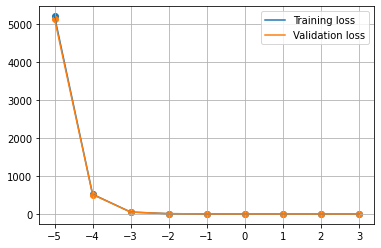

In [ ]:
x =np.log10(complexity1)
#storing the log of complexity for the plot

y_train1 = RMSE_values_train1
y_valid1 = RMSE_values_valid1
#assigning the Respective RMSE of training and validation data to an array for plotting 

plt.scatter(x, y_train1)
plt.scatter(x, y_valid1)
#making a scatter plot

plt.grid()
#adding gridlines

plt.plot(x, y_train1, label= "Training loss")
plt.plot(x, y_valid1, label = "Validation loss")
#adding a line plot passing through the points

plt.legend()
#adding the legends

plt.show()
#displaying the final plot

Selecting the best lamda value for MSE+lamda*L2(w) loss function 

In [ ]:
iml1 = np.argmin(y_valid1)
#storing the index of the minimum RMSE value

minx1 = x[iml1]
#finding the value of log(complexity) for the lowest RMSE

antilog1 = 10 ** minx1
#taking the antilog

lamdamin1 = 1/antilog1
#determing the value of lamda at lowest RMSE

Minimum_RMSE_loss_L2 = RMSE_values_valid1[iml1]
#storing the minimum RMSE loss for validation data

final_weights_L2 = Gradient_Descent(X_train, X_valid, Y_train, Y_valid, w1, lamdamin1, 300, 1e-10, 5e-2, L1_Loss,L1_Gradient)[0]
#storing the weights for the lowest lamda for further analysis

print ("The best lamda is equal to {} and the minimum RMSE loss found using L2 loss function model is equal to {}." .format(lamdamin1,Minimum_RMSE_loss_L2))


The best lamda is equal to 0.001 and the minimum RMSE loss found using L2 loss function model is equal to 0.4463899361252809.


## Generating the model using the MSE+lamda*L1(w) loss function

In [ ]:
lamdai = 0.001
lamdaf = 100000
#Assigning the initial and final values of lamda

complexity2 = np.array([])
RMSE_values_valid2 = np.array([])
RMSE_values_train2 = np.array([])
#creating the null arrays for storing the values of complexity, RMSE values of train and validation data

w2 = np.random.randn(len(X_train[0])+1)
#Creating a random weight vector

while lamdai <= lamdaf:
  complexity2 = np.append(complexity2, [1/lamdai])
  #Appending the complexity values to the complexity array  

  results2 = Gradient_Descent(X_train, X_valid, Y_train, Y_valid, w2, lamdai, 300, 1e-10, 5e-2, L1_Loss,L1_Gradient) #test(X_test, w)
  #Calling the gradient descent function to find the weight vector

  RMSE_valid2 = np.sqrt(results2[2])
  RMSE_train2 = np.sqrt(results2[1])
  #Storing the RMSE values for both training and validation data 

  RMSE_values_valid2 = np.append(RMSE_values_valid2, [RMSE_valid2], axis = 0)
  RMSE_values_train2 = np.append(RMSE_values_train2, [RMSE_train2], axis = 0)
  #Appending The RMSE values in respective arrays

  lamdai = 10*lamdai
  #Reasigning a higher lamda value by multiplying with 10

In [ ]:
while lamdai <= lamdaf:
  complexity2 = np.append(complexity2, [1/lamdai])
  results2 = Gradient_Descent(X_train, X_valid, Y_train, Y_valid, w2, lamdai, 300, 1e-10, 5e-2, L1_Loss,L1_Gradient) #test(X_test, w) 
  RMSE_valid2 = np.sqrt(results2[2])
  RMSE_train2 = np.sqrt(results2[1])
  RMSE_values_valid2 = np.append(RMSE_values_valid2, [RMSE_valid2], axis = 0)
  RMSE_values_train2 = np.append(RMSE_values_train2, [RMSE_train2], axis = 0)
  lamdai = 10*lamdai

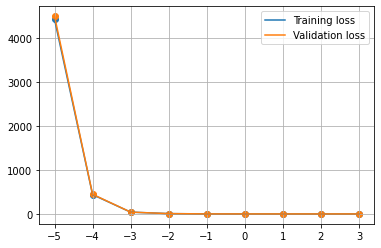

In [ ]:
x =np.log10(complexity2)
#storing the log of complexity for the plot 

y_train2 = RMSE_values_train2
y_valid2 = RMSE_values_valid2
#assigning the Respective RMSE of training and validation data to an array for plotting 

plt.scatter(x, y_train2)
plt.scatter(x, y_valid2)
#making a scatter plot

plt.grid()
#adding gridlines

plt.plot(x, y_train2, label= "Training loss")
plt.plot(x, y_valid2, label = "Validation loss")
#adding a line plot passing through the points

plt.legend()
#adding the legends

plt.show()
#displaying the final plot

In [ ]:
iml2 = np.argmin(y_valid2)
#storing the index of the minimum RMSE value

minx2 = x[iml2]
#finding the value of log(complexity) for the lowest RMSE

antilog2 = 10 ** minx2
#taking the antilog

lamdamin2 = 1/antilog2
#determing the value of lamda at lowest RMSE

Minimum_RMSE_loss_L1 = RMSE_values_valid2[iml2]
#storing the minimum RMSE loss for validation data

final_weights_L1 = Gradient_Descent(X_train, X_valid, Y_train, Y_valid, w2, lamdamin2, 300, 1e-10, 5e-2, L1_Loss,L1_Gradient)[0]
#storing the weights for the lowest lamda for further analysis

print ("The best lamda is equal to {} and the minimum RMSE loss found using L1 loss function model is equal to {}." .format(lamdamin2,Minimum_RMSE_loss_L1))


The best lamda is equal to 0.01 and the minimum RMSE loss found using L1 loss function model is equal to 0.44734937413360504.


##Generating the model using the Pseudo Inverse method

> Indented block



In [ ]:
lamdai = 0.001
lamdaf = 100000
#Assigning the initial and final values of lamda

complexity3 = np.array([])
RMSE_values_valid3 = np.array([])
RMSE_values_train3 = np.array([])
#creating the null arrays for storing the values of complexity, RMSE values of train and validation data

while lamdai <= lamdaf:
  complexity3 = np.append(complexity3, [1/lamdai])
  #Appending the complexity values to the complexity array 

  w3 = Pseudo_Inverse(X_train, Y_train, lamdai)
  #Calling the pseudo inverse function to find the weight vector

  RMSE_valid3 = np.sqrt(MSE_Loss(X_valid, Y_valid, w3))
  RMSE_train3 = np.sqrt(MSE_Loss(X_train, Y_train, w3))
  #Storing the RMSE values for both training and validation data 

  RMSE_values_valid3 = np.append(RMSE_values_valid3, [RMSE_valid3], axis = 0)
  RMSE_values_train3 = np.append(RMSE_values_train3, [RMSE_train3], axis = 0)
  #Appending The RMSE values in respective arrays

  lamdai = 10*lamdai
  #Reasigning a higher lamda value by multiplying with 10

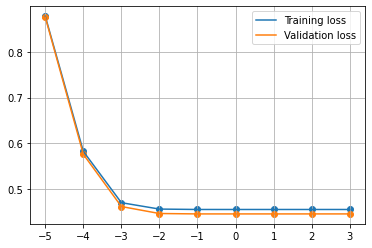

In [ ]:
x =np.log10(complexity3)
#storing the log of complexity for the plot

y_train3 = RMSE_values_train3
y_valid3 = RMSE_values_valid3
#assigning the Respective RMSE of training and validation data to an array for plotting 

plt.scatter(x, y_train3)
plt.scatter(x, y_valid3)
#making a scatter plot 

plt.grid()
#adding gridlines

plt.plot(x, y_train3, label= "Training loss")
plt.plot(x, y_valid3, label = "Validation loss")
#adding a line plot passing through the points

plt.legend()
#adding the legends

plt.show()
#displaying the final plot

In [ ]:
iml3 = np.argmin(y_valid3)
#storing the index of the minimum RMSE value

minx3 = x[iml3]
#finding the value of log(complexity) for the lowest RMSE

antilog3 = 10 ** minx3
#taking the antilog

lamdamin3 = 1/antilog3
#determing the value of lamda at lowest RMSE

Minimum_RMSE_loss_pseudo = RMSE_values_valid3[iml3]
#storing the minimum RMSE loss for validation data

final_weight_pseudo = Pseudo_Inverse(X_train, Y_train, lamdamin3)
#storing the weights for the lowest lamda for further analysis

print ("The best lamda is equal to {} and the minimum RMSE loss found using the Pseudo inverse method model is equal to {}." .format(lamdamin3,Minimum_RMSE_loss_pseudo))

The best lamda is equal to 1.0 and the minimum RMSE loss found using the Pseudo inverse method model is equal to 0.44617263492168224.


### Additional exercises

In [ ]:
df_y_validation = df_val['Next_Tmax'].values
#Assigning the Y data from the validation data set to a variable

df_y_validation_mean = df_y_validation.mean()
#finding the mean value of the Y from the validation data

df_y_validation_std = df_y_validation.std()
#finding the standard deviation of the Y from the validation data

In [ ]:
def Final_Prediction (X,weights):
  X_valid = X
  final_weights = weights

  df_y_validation_prediction = Prediction(X_valid,final_weights)
  #Predicting the normalised values of Y using the weights from the best model

  final_validation_predicted_values = (df_y_validation_prediction * df_y_validation_std) + df_y_validation_mean
  #Denormalising the predicted value using the equation  y = (y'*std(y)) + mean(y)

  return final_validation_predicted_values

In [ ]:
def plot1(df_y_validation,final_validation_predicted_values):
  x = df_y_validation
  y_validation_prediction = final_validation_predicted_values
  y_validation = df_y_validation
  #Assigning the values of x,y validation and yprediction to be plotted 

  plt.scatter(x, y_validation_prediction, label = "Y_prediction")
  plt.scatter(x, y_validation, label= "Y_validation")
  plt.grid()
  plt.legend()
  plt.show()
  #plotting using scatter and grid method

In [ ]:
def plot2(df_y_validation,final_validation_predicted_values):

  y_validation_prediction = final_validation_predicted_values
  y_validation = df_y_validation

  plt.plot(y_validation_prediction, label= "Y_prediction", linestyle = "--" )
  plt.plot(y_validation, label = "Y_validation")
  plt.legend()
  plt.grid()
  plt.show()
  #plotting using line and grid method

In [ ]:
def R2_value(df_y_validation,final_validation_predicted_values,df_y_validation_mean):
  E1 = (df_y_validation - final_validation_predicted_values)**2
  sum_E1 = sum(E1)
  # Finding the E1 value by squaring the difference between prediction y and actual y and sum up

  E2 = (df_y_validation - df_y_validation_mean)**2
  sum_E2 = sum(E2)
  # Finding the E2 value by squaring the difference between mean of actual y and actual y and sum up

  R_square_value = 1 - (sum_E1/sum_E2)
  # Calculating R^2 value by the equation R2= 1- SSres / SStot

  print("Coefficient of determination is {}".format(R_square_value))

## Comparing the R2 values and the Y prediction vs Y actual graph using the three models

## L2 Loss model

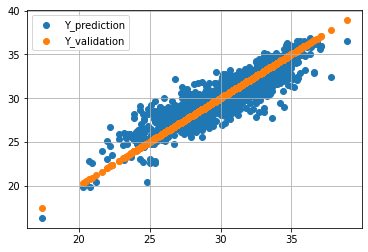

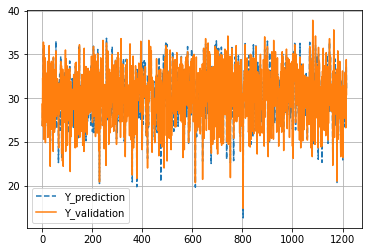

Coefficient of determination is 0.800736024926068


In [ ]:
x1 = Final_Prediction (X_valid,final_weights_L2)
plot1(df_y_validation,x1)
plot2(df_y_validation,x1)
R2_value(df_y_validation,x1,df_y_validation_mean)

## L1-Loss model

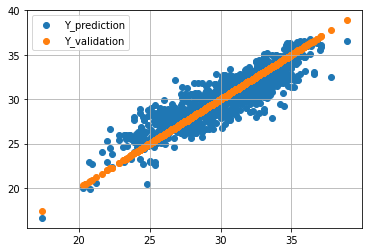

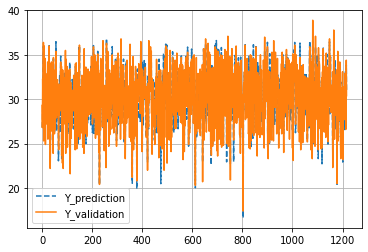

Coefficient of determination is 0.7998785374622723


In [ ]:
x1 = Final_Prediction (X_valid,final_weights_L1)
plot1(df_y_validation,x1)
plot2(df_y_validation,x1)
R2_value(df_y_validation,x1,df_y_validation_mean)

## pseudo inverse model

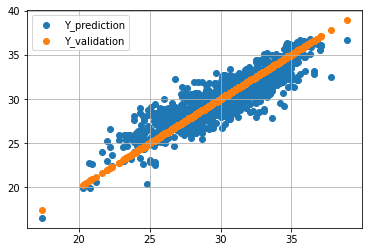

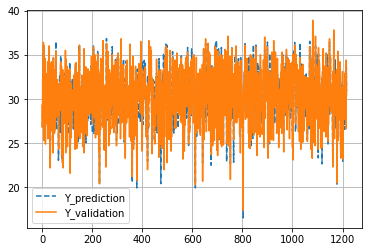

Coefficient of determination is 0.8009299798470437


In [ ]:
x1 = Final_Prediction (X_valid, final_weight_pseudo)
plot1(df_y_validation,x1)
plot2(df_y_validation,x1)
R2_value(df_y_validation,x1,df_y_validation_mean)

## Observation and conclusion
1. Upon analysing the results from various models, it appears that the data doesn't seem to overfit at any value of lamda, although there is a clear underfitting at the higher values.
2. The complexity vs RMSE curve appears to flatten after certain values of lambda for all the models, therefore any lamda post curve flattening can serve as an ideal lamda value.
3. The models seems to fit well with the validation dataset with low RMSE values for all the models.
4. The lowest RMSE for every model is comparable. 
5. The L2 loss model, L1 loss model and Pseudo inverse method model show the lowest RMSEs of 0.4464, 0.4474, 0.4462 for lamda = 0.01, 0.1, 1 respectively.
6. Moreover, the R2 value for all the models is also comparabel, 0.8007, 0.7999, 0.8010 respectively.
7. In order to rationally choose the best model, for runing it for the test set, we chose the model which had the lowest RMSE at the best value of lamda (showing the lowest RMSE for that model).
8. Therefore, we ran the test set on the pseudo inverse method model as it displayed the lowest RMSE out of all the three models.


## Running the best model on test data

In [ ]:
df_test = pd.read_csv("TempTest.csv")
#importing the test data

In [ ]:
df_test.head()
#visualising the data imported

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,27.9,19.9,58.964123,97.821373,26.798375,20.828714,6.397833,75.366664,0.197580,0.306510,0.423613,0.842868,0.0,0.0,0.0,0.025890,37.6046,126.991,212.3350,2.7850,5992.895996
1,30.3,21.0,51.617828,89.577393,29.069652,22.979956,6.199736,54.449329,0.193229,0.311707,0.431707,0.816846,0.0,0.0,0.0,0.031924,37.6046,127.032,44.7624,0.5141,5869.312500
2,30.2,22.5,47.538521,85.529457,29.696974,23.554281,6.269956,14.450297,0.200518,0.301901,0.410575,0.825653,0.0,0.0,0.0,0.011254,37.5776,127.058,33.3068,0.2661,5863.555664
3,30.7,22.0,59.407711,98.806969,28.234872,21.380987,6.755825,105.226457,0.186295,0.302106,0.397818,0.781959,0.0,0.0,0.0,0.041682,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,0.447998,0.823050,0.0,0.0,0.0,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246


In [ ]:
df_normalise_test = Normalize(df_test)
#Normalising the data by calling Normalization function

In [ ]:
df_normalise_test
#Analysing the normalised data

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.540282,-1.527817,-0.041005,1.508753,-0.915500,-1.206994,-0.279521,0.355374,-0.637037,-0.228241,0.188195,1.945708,-0.296257,-0.267125,-0.248088,-0.214160,1.181652,0.005432,2.746730,1.110813,1.526124
1,0.253602,-1.063689,-0.532041,0.275667,-0.184206,-0.329082,-0.387764,-0.227046,-0.654272,-0.207673,0.219228,1.844495,-0.296257,-0.267125,-0.248088,-0.209425,1.181652,0.525471,-0.317056,-0.540828,1.234596
2,0.220523,-0.430788,-0.804708,-0.329799,0.017776,-0.094702,-0.349395,-1.340776,-0.625399,-0.246484,0.138206,1.878749,-0.296257,-0.267125,-0.248088,-0.225646,0.646794,0.855252,-0.526502,-0.721201,1.221016
3,0.385916,-0.641755,-0.011355,1.656172,-0.452985,-0.981614,-0.083910,1.186788,-0.681741,-0.245673,0.089299,1.708808,-0.296257,-0.267125,-0.248088,-0.201766,1.981957,0.398632,-0.299621,0.928841,1.205469
4,0.485151,-0.726142,-0.305697,0.767718,-0.532406,-0.661995,-0.365214,1.174670,-0.733438,-0.286258,0.281684,1.868628,-0.296257,-0.267125,-0.248088,-0.223488,0.113918,1.831910,-0.494850,-0.547083,1.211572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-2.128050,-2.413879,-2.332000,-1.416915,-0.588914,-2.237721,-0.167277,-1.475435,-1.210162,-1.322004,-1.435924,-1.315524,-0.296257,-0.267125,-0.248088,-0.234478,0.113918,0.626942,-0.654647,-0.498645,-2.099289
1502,-2.326521,-2.582653,-1.970665,-0.604932,-0.945596,-2.437270,-0.623625,0.544157,-1.156450,-1.344368,-1.435922,-1.263803,-0.296257,-0.267125,-0.248088,-0.234478,-0.688368,1.210400,-0.733836,-0.817860,-2.132835
1503,-2.061893,-2.709233,-2.194821,-1.325903,-1.059196,-2.044829,-0.415532,0.263256,-1.300751,-1.120675,-1.435924,-1.332560,-0.296257,-0.267125,-0.248088,-0.234478,-0.153511,-1.262955,-0.850469,-0.801714,-2.129272
1504,-2.061893,-2.456072,-2.375338,-1.561464,-0.847300,-2.062034,-0.200299,-0.427741,-1.277618,-1.144711,-1.435924,-1.332560,-0.296257,-0.267125,-0.248088,-0.234478,-0.420939,-1.034645,-0.819241,-0.753057,-2.140927


In [ ]:
predicted_values = Prediction(df_normalise_test,final_weight_pseudo)
#Predicting the normalised values of Y using the weights from the best model

In [ ]:
df_y_train = df_train['Next_Tmax'].values
#Assigning the Y data from the training data set to a variable

df_y_mean = df_y_train.mean()
#finding the mean value of the Y from the train data

df_y_std = df_y_train.std()
#finding the standard deviation of the Y from the train data

In [ ]:
final_predicted_values = (predicted_values * df_y_std) + df_y_mean
#Denormalising the predicted value using the equation  y = (y'*std(y)) + mean(y)

In [ ]:
final_predicted_values

array([27.39517851, 29.29981781, 29.4290554 , ..., 27.17821286,
       27.2782725 , 27.2230141 ])

In [ ]:
#from google.colab import files
#prediction_1 = pd.DataFrame(final_predicted_values)
#prediction_1.to_csv('prediction1.csv',index = False)
#files.download('prediction1.csv')

References

https://numpy.org/ (for understanding numpy functions)

https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc

https://medium.com/@IwriteDSblog/gradient-descent-for-multivariable-regression-in-python-d430eb5d2cd8

https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

https://stackoverflow.com/questions/26333005/numpy-subtract-every-row-of-matrix-by-vector/26333184
